<a href="https://colab.research.google.com/github/Abishek-Subramaniam/EDA-ECOMMERCE/blob/main/Shopping_Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Dataset & Preprocessing of data as required**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import gdown

In [ ]:
shop = pd.read_csv("/content/drive/MyDrive/Ecommerce EDA/shopping_dataset.csv")

In [ ]:
# Shape of the shop  -
print("No. of Rows : ", shop.shape[0])
print("No. of Columns : ", shop.shape[1])

No. of Rows :  12330
No. of Columns :  18


In [ ]:
# Checking for duplicate rows -
print("No. of duplicate rows: ", shop.duplicated().sum())

No. of duplicate rows:  0


In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
shop['Month'].unique()

array(['Mar', 'Aug', 'Jul', 'Dec', 'June', 'Feb', 'Nov', 'Oct', 'May',
       'Sep', 'Jan', 'Apr'], dtype=object)

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

shop['Month'] = pd.Categorical(shop['Month'], categories=month_order, ordered=True)

In [ ]:
shop['SpecialDay'].unique()

array([0.84, 0.85, 0.76, 0.81, 0.08, 0.05, 0.59, 0.24, 0.03, 0.07, 0.63,
       0.14, 0.99, 0.44, 0.54, 0.26, 0.66, 0.91, 0.18, 0.95, 0.22, 0.27,
       0.8 , 0.64, 0.74, 0.16, 0.87, 0.78, 0.96, 0.41, 0.52, 0.7 , 0.1 ,
       0.21, 0.29, 0.  , 0.4 , 0.65, 0.45, 0.01, 0.86, 0.68, 0.15, 0.04,
       0.38, 0.06, 0.82, 0.73, 0.31, 0.3 , 0.34, 0.57, 0.48, 0.92, 0.5 ,
       0.56, 0.19, 0.2 , 0.35, 0.79, 0.6 , 0.53, 0.55, 0.75, 0.71, 0.47,
       0.88, 0.09, 0.51, 0.69, 0.77, 0.83, 0.02, 0.46, 0.49, 0.72, 0.11,
       0.23, 0.98, 0.17, 0.94, 0.32, 0.67, 0.43, 0.25, 0.37, 0.62, 0.39,
       0.58, 0.33, 0.36, 0.28, 0.13, 0.97, 1.  , 0.93, 0.61, 0.12, 0.42,
       0.9 , 0.89])

In [ ]:
# change column type to bool  ,'SpecialDay'
shop[['OperatingSystems', 'Browser', 'Region','TrafficType','VisitorType']] = shop[['OperatingSystems', 'Browser', 'Region','TrafficType','VisitorType']].astype('category')

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    11351 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [ ]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,6,370.90,3,175.24,132,510.87,0.3206,0.2987,8.76,0.84,Mar,8,11,3,4,Returning_Visitor,False,False
1,19,378.35,1,267.07,44,54.92,0.9499,0.5986,5.35,0.85,Aug,2,9,9,11,New_Visitor,True,False
2,14,333.45,9,27.13,74,1828.22,0.2728,0.1793,21.39,0.76,Jul,2,1,3,6,Other,False,False
3,10,117.01,9,208.42,143,1817.27,0.8766,0.4732,0.61,0.81,Dec,8,6,3,19,Returning_Visitor,True,False
4,7,294.04,3,278.04,57,911.72,0.9749,0.2510,19.07,0.08,NaN,1,5,2,6,New_Visitor,True,False


In [ ]:
shop.query('SpecialDay != 0').head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,6,370.90,3,175.24,132,510.87,0.3206,0.2987,8.76,0.84,Mar,8,11,3,4,Returning_Visitor,False,False
1,19,378.35,1,267.07,44,54.92,0.9499,0.5986,5.35,0.85,Aug,2,9,9,11,New_Visitor,True,False
2,14,333.45,9,27.13,74,1828.22,0.2728,0.1793,21.39,0.76,Jul,2,1,3,6,Other,False,False
3,10,117.01,9,208.42,143,1817.27,0.8766,0.4732,0.61,0.81,Dec,8,6,3,19,Returning_Visitor,True,False
4,7,294.04,3,278.04,57,911.72,0.9749,0.2510,19.07,0.08,NaN,1,5,2,6,New_Visitor,True,False


In [ ]:
shop['VisitorType'].nunique()

3

In [ ]:
def missing_values(df):
    print("Missing Values")
    print("-"*15)
    missing = False
    for i in shop.columns:
      missing_count = shop[i].isna().sum()
      if missing_count > 0:
          print(f"{i} : {missing_count}")
          missing = True
    if not missing:
          print('No Missing Values in the DataFrame')

In [ ]:
missing_values(shop)

Missing Values
---------------
Month : 979


**Exploratory Data Analysis**

In [ ]:
num_columns = shop.select_dtypes(include=['int64', 'float64']).columns
cat_columns = shop.select_dtypes(include=['category']).columns

In [ ]:
num_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

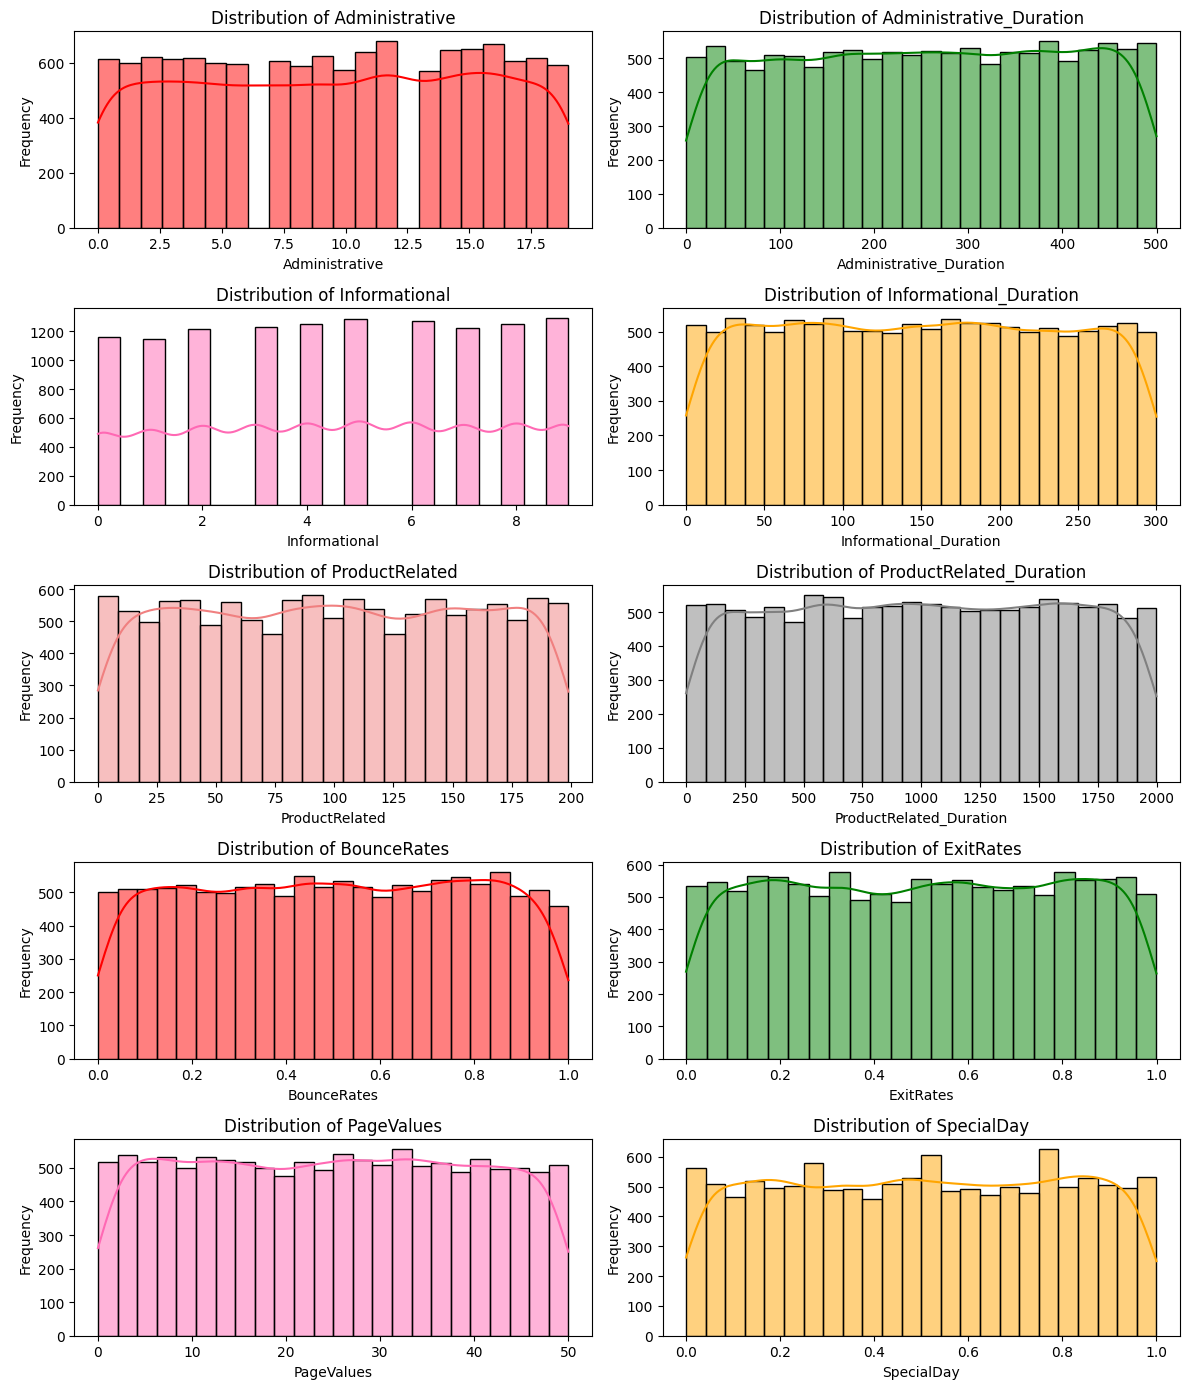

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange']
counter = 0

for i in range(5):
    for j in range(2):
        sns.histplot(data=shop, x=num_columns[counter], kde=True, color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()
plt.show()

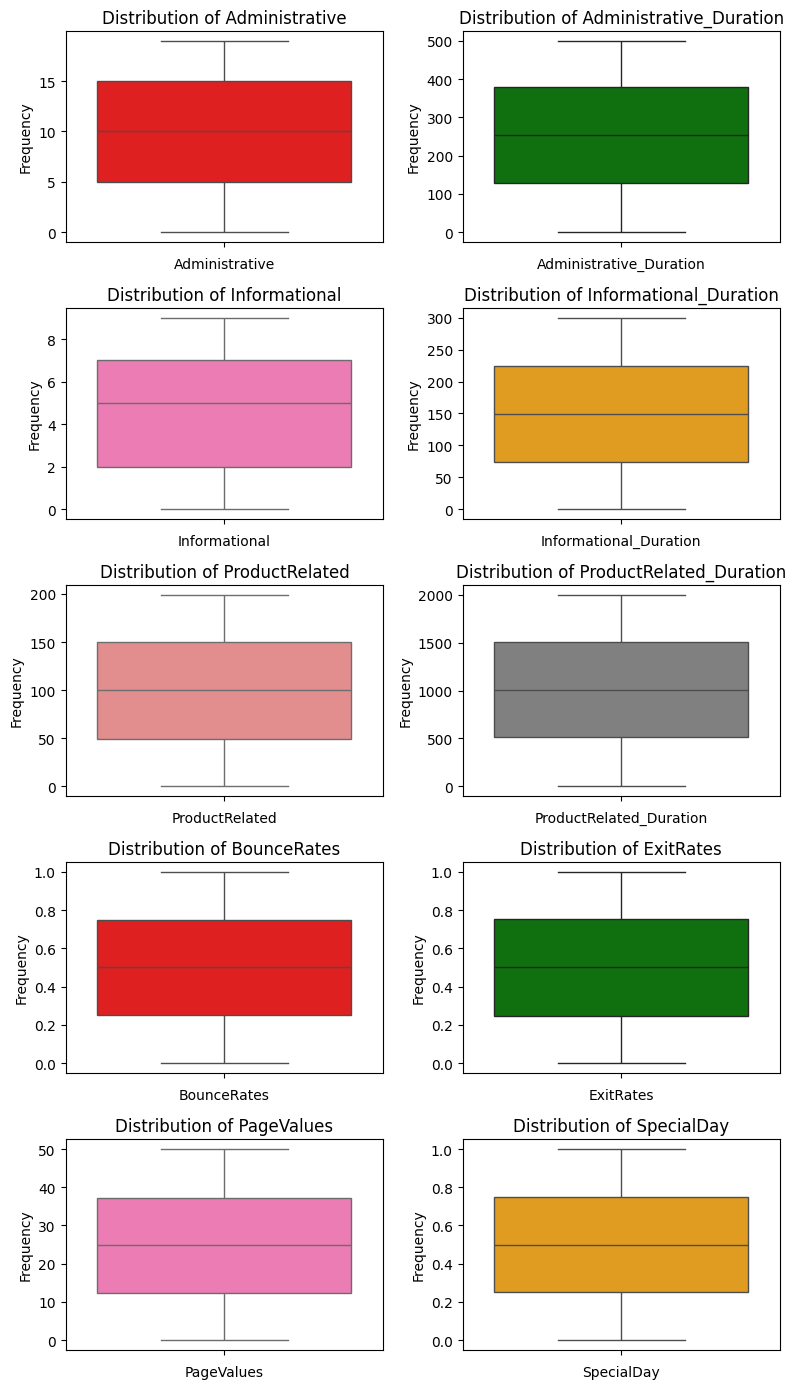

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange']
counter = 0

for i in range(5):
    for j in range(2):
        sns.boxplot(data=shop, y = num_columns[counter], color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()
plt.show()

In [ ]:
for col in num_columns:
    percentile_5 = np.percentile(shop[col], 5)
    percentile_95 = np.percentile(shop[col], 95)
    shop[col] = np.round(np.clip(shop[col], percentile_5, percentile_95),2)

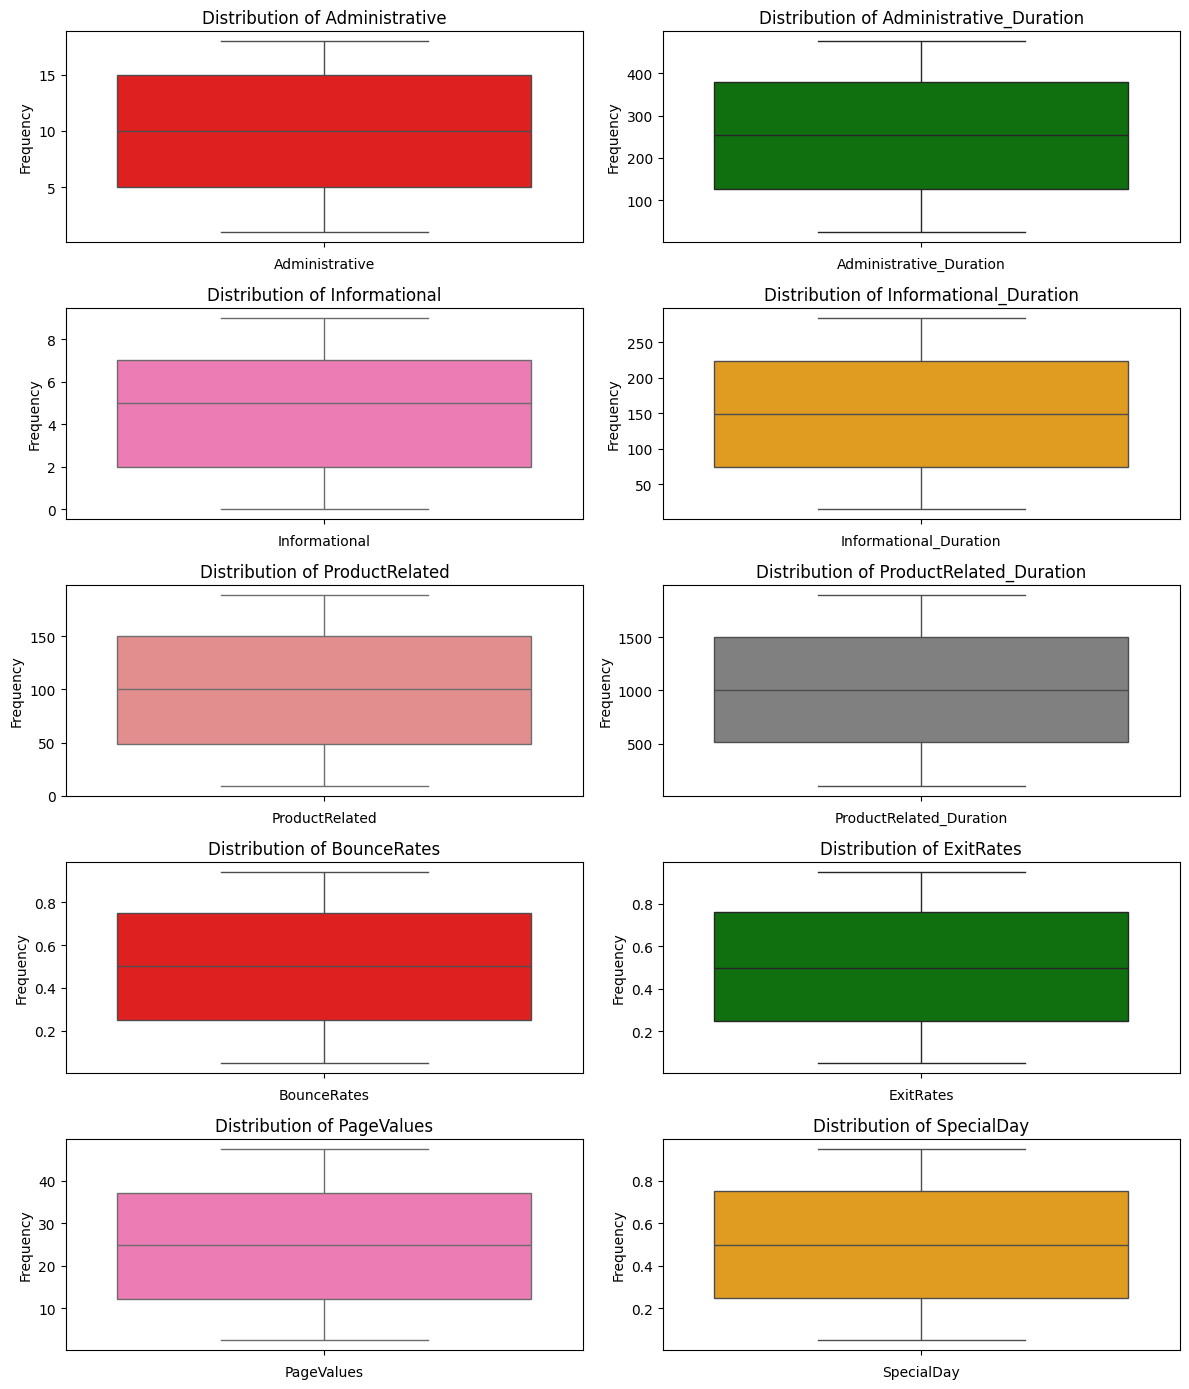

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange']
counter = 0

for i in range(5):
    for j in range(2):
        sns.boxplot(data=shop, y = num_columns[counter], color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()
plt.show()

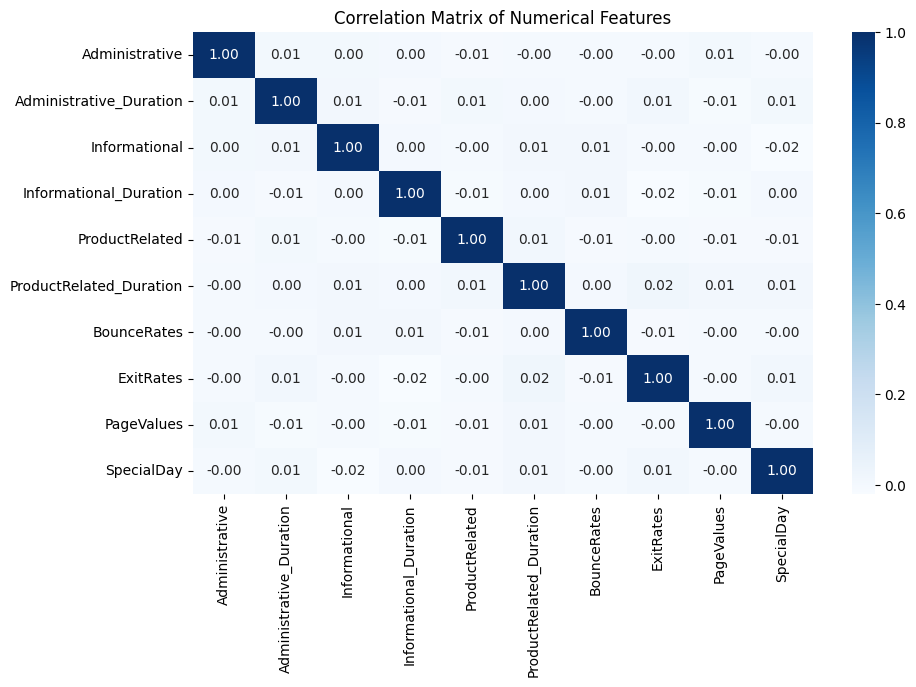

In [ ]:
corr_matrix = shop[num_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

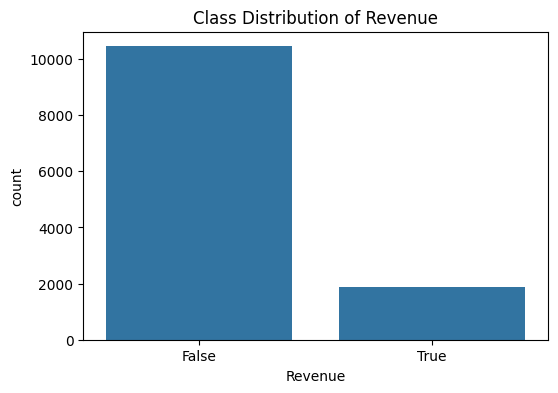

Revenue
False    84.785077
True     15.214923
Name: proportion, dtype: float64


In [ ]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=shop)
plt.title('Class Distribution of Revenue')
plt.show()

# Display class distribution percentages
class_distribution = shop['Revenue'].value_counts(normalize=True) * 100
print(class_distribution)

In [ ]:
cat_columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')

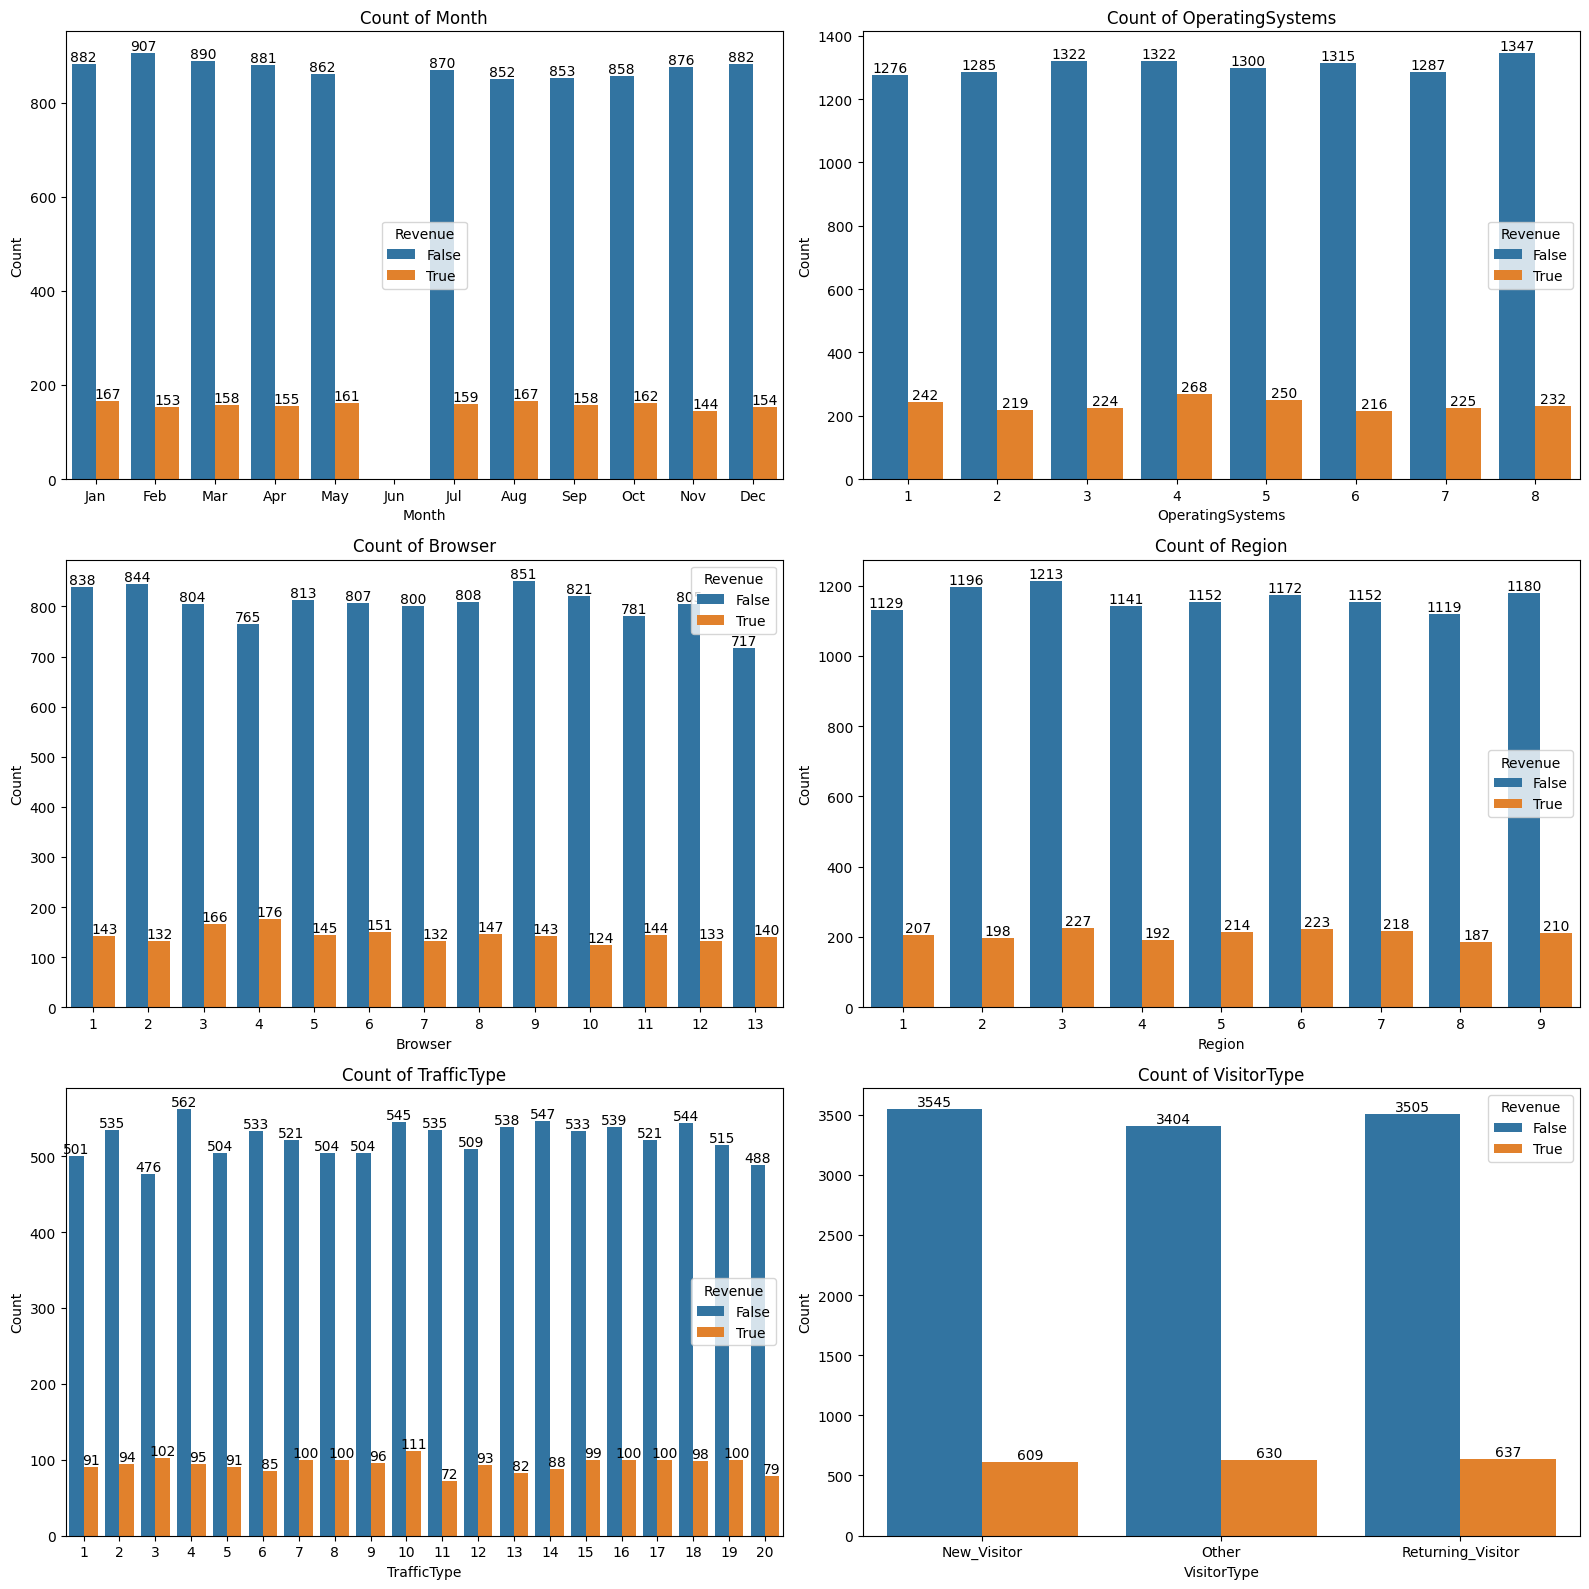

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16,16))
#c = ['red', 'green', 'hotpink', 'orange' ,'lightcoral','grey']
plot_number = 0
k=0
for i in range(3):
  for j in range(2):
    sns.countplot(data = shop, x = cat_columns[plot_number],hue = shop['Revenue'], ax = axes[i,j])
    for p in axes[i,j].containers:
      axes[i,j].bar_label(p)
    axes[i,j].set_title(f"Count of {cat_columns[plot_number]}")
    axes[i,j].set_xlabel(cat_columns[plot_number])
    axes[i,j].set_ylabel('Count')
    plot_number += 1
    k += 1
plt.tight_layout()
plt.show()

In [ ]:
for i in cat_columns:
  print(shop[i].value_counts(normalize = True)*100)
  print("\n")

Month
Feb    9.338384
Jan    9.241477
Mar    9.232667
Apr    9.126949
Dec    9.126949
Jul    9.065281
May    9.012422
Oct    8.985992
Nov    8.985992
Aug    8.977183
Sep    8.906704
Jun    0.000000
Name: proportion, dtype: float64


OperatingSystems
4    12.895377
8    12.806164
5    12.570965
3    12.538524
6    12.416869
1    12.311436
7    12.262774
2    12.197891
Name: proportion, dtype: float64


Browser
9     8.061638
1     7.956204
2     7.915653
3     7.866991
5     7.769667
6     7.769667
8     7.745337
10    7.664234
4     7.631792
12    7.607461
7     7.558800
11    7.502028
13    6.950527
Name: proportion, dtype: float64


Region
3    11.678832
6    11.313869
2    11.305758
9    11.273317
7    11.111111
5    11.078670
1    10.835361
4    10.811030
8    10.592052
Name: proportion, dtype: float64


TrafficType
4     5.328467
10    5.320357
18    5.206813
16    5.182482
14    5.150041
15    5.125710
2     5.101379
7     5.036496
17    5.036496
13    5.028386
6     5.012165
19 

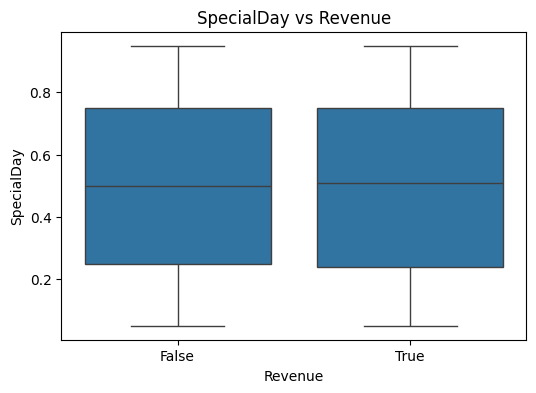

In [ ]:
# SpecialDay vs Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(x='Revenue', y='SpecialDay', data=shop)
plt.title('SpecialDay vs Revenue')
plt.show()

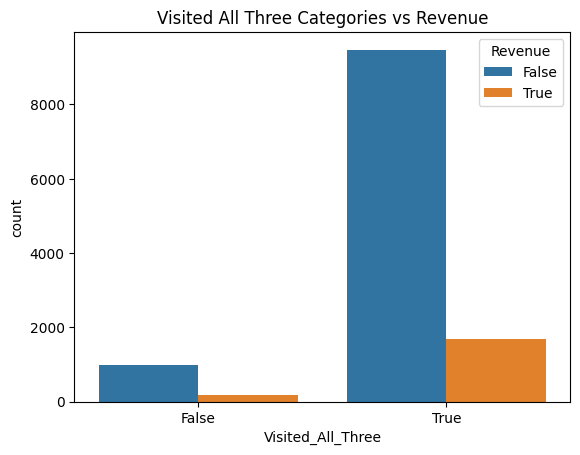

In [ ]:
shop['Visited_All_Three'] = (shop['Administrative'] > 0) & (shop['Informational'] > 0) & (shop['ProductRelated'] > 0)

sns.countplot(x='Visited_All_Three', hue='Revenue', data=shop)
plt.title('Visited All Three Categories vs Revenue')
plt.show()

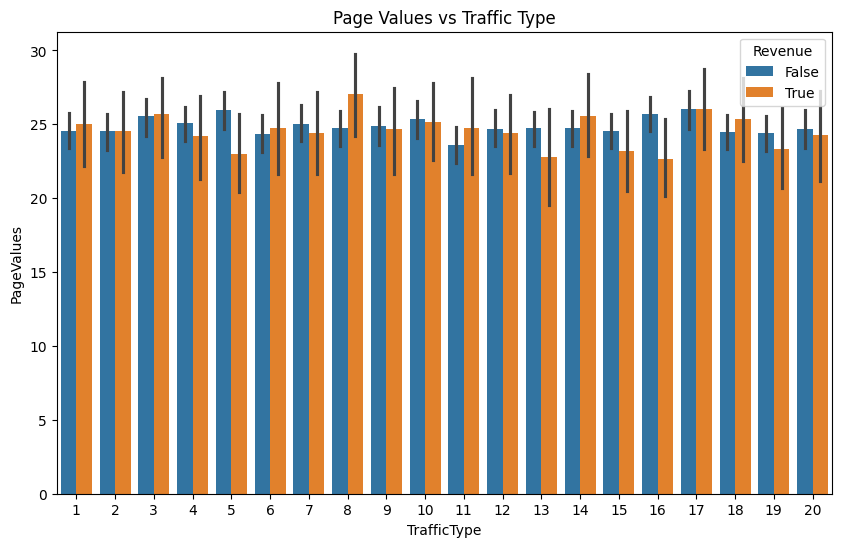

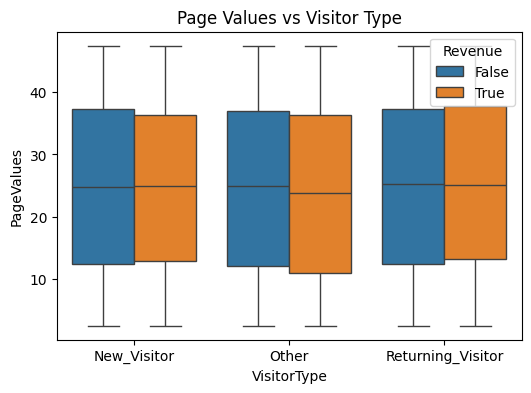

In [40]:
# PageValues vs TrafficType
plt.figure(figsize=(10, 6))
sns.barplot(x='TrafficType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Traffic Type')
plt.show()

# PageValues vs VisitorType
plt.figure(figsize=(6, 4))
sns.boxplot(x='VisitorType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Visitor Type')
plt.show()

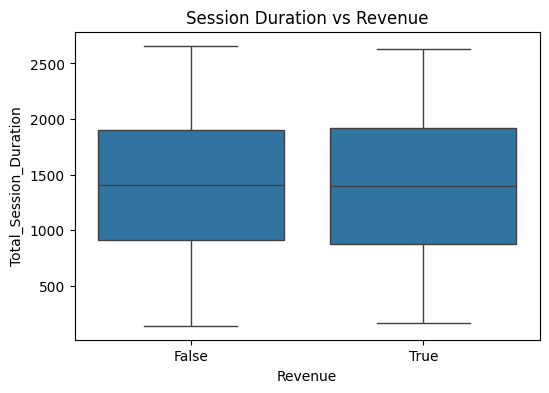

In [41]:
# Calculate session length
shop['Total_Session_Duration'] = shop['Administrative_Duration'] + shop['Informational_Duration'] + shop['ProductRelated_Duration']

# Plot session length vs Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(x='Revenue', y='Total_Session_Duration', data=shop)
plt.title('Session Duration vs Revenue')
plt.show()

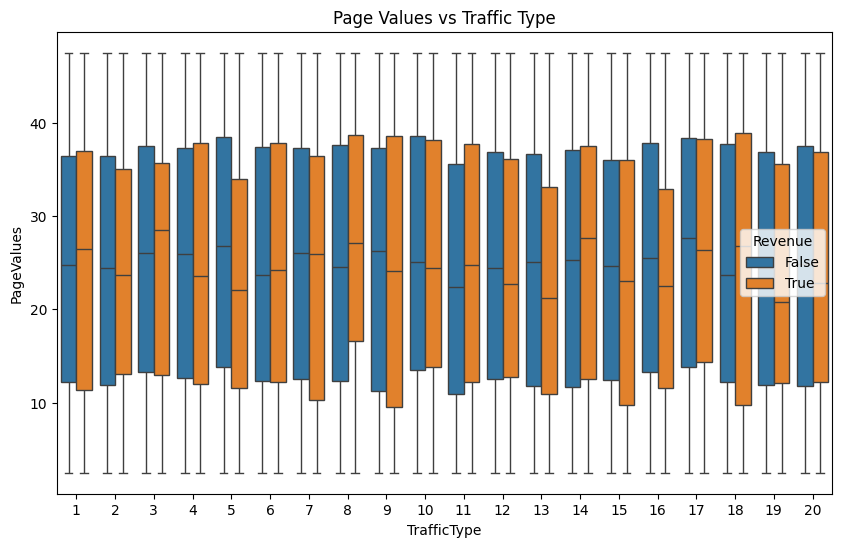

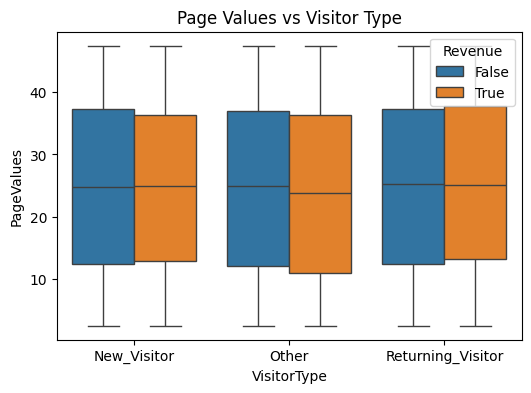

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TrafficType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Traffic Type')
plt.show()

# PageValues vs VisitorType
plt.figure(figsize=(6, 4))
sns.boxplot(x='VisitorType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Visitor Type')
plt.show()